In [44]:
""" Get tidal current from AVISO FES 2014 model. And write to file according to the merged adcp data's lon/ lat/ time. 
"""
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pyfes ### has to use newpycode
import os
import sys
path_nhchi = os.path.expanduser('~/Documents/nhchi_work_2022/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from convert_time import datetime_to_yearday

In [45]:
### Info of SD-1042's merged adcp data
year = '2023'
platf_num = '1042'
path_cur_SD = '/Users/chi/Documents/projects/sd-ni-wp/data_manipulate/data_merge_adcp/'
tlim_plot = [datetime.datetime(int(year),10,19), datetime.datetime(int(year),11,17)] ### 2023 SD1042
tint = 3
nt_plot = int((tlim_plot[1]-tlim_plot[0]).days)
tticks = [tlim_plot[0]+datetime.timedelta(days=i) for i in range(nt_plot)]
tticks_label = [tticks[i].strftime('%m/%d') for i in range(len(tticks))]
print(tticks_label)
### load adcp data
ds_cur_SD = nc.Dataset(path_cur_SD+'adcp-raw-merge-'+year+'-SD'+platf_num+'.nc')
time = ds_cur_SD.variables['time'][:]
dtime_cur_SD = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
_, yday_cur_SD = datetime_to_yearday( dtime_cur_SD )
print(ds_cur_SD)
vars_str = ['longitude','latitude','vel_east','vel_north','depth']
for i in range( len(vars_str) ):
    temp = ds_cur_SD.variables[vars_str[i]][:]
    temp.filled(np.nan)
    exec( vars_str[i]+' = temp')
del time

['10/19', '10/20', '10/21', '10/22', '10/23', '10/24', '10/25', '10/26', '10/27', '10/28', '10/29', '10/30', '10/31', '11/01', '11/02', '11/03', '11/04', '11/05', '11/06', '11/07', '11/08', '11/09', '11/10', '11/11', '11/12', '11/13', '11/14', '11/15', '11/16']
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Merged files for 2023 SD-1042
    subtitle: Only selected variables for adcp measurements are here. Temporal resolution is ~10-minute.
    dimensions(sizes): depth(50), time(6154), beam(4)
    variables(dimensions): float64 depth(depth), float64 time(time), float64 longitude(time), float64 latitude(time), float64 pitch(time), float64 roll(time), float64 heading(time), float64 vehicle_vel_east(time), float64 vehicle_vel_north(time), float64 vehicle_vel_up(time), float64 bt_vel_east(time), float64 bt_vel_north(time), float64 bt_vel_up(time), float64 vel_east(time,depth), float64 vel_north(time,depth), float64 vel_up(time,depth)

/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_33667/2530675075.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time = ds_cur_SD.variables['time'][:]
/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_33667/2530675075.py:16: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ds_cur_SD)
/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_33667/2530675075.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

In [3]:
### Use pyfes tool box to build the tide model
path_aviso = os.path.expanduser('~/Documents/Data/AVISO/auxiliary/tide_model/fes2014/')
ConfigFileU = path_aviso+'eastward_velocity.ini'
ConfigFileV = path_aviso+'/northward_velocity.ini'
eastward_velocity = pyfes.Handler("ocean","memory",ConfigFileU)
northward_velocity = pyfes.Handler("ocean", "memory",ConfigFileV)

In [4]:
### get tidal currents by specifying time and locations
u_tide = np.nan*np.ones( len(dtime_cur_SD) )
v_tide = u_tide.copy()
for i in range( len(dtime_cur_SD) ):
    u_tide[i], _, _ = eastward_velocity.calculate(np.array([longitude[i]]),np.array([latitude[i]]),np.array([dtime_cur_SD[i]]))
    v_tide[i], _, _ = northward_velocity.calculate(np.array([longitude[i]]),np.array([latitude[i]]),np.array([dtime_cur_SD[i]]))

In [5]:
### write tidal current data to txt file
header = 'datetime, longitude(deg), latitude(degN), utide(cm/s), vtide(cm/s). Data derived from AVISO FES2014 model.'
arr_out = np.column_stack( (dtime_cur_SD, longitude, latitude, u_tide, v_tide) )
### write to a file
fileID = open('timeseries_uv-tide_'+year+'-SD'+platf_num+'.txt','w')
np.savetxt(fileID,arr_out,fmt='%s',header=header)
fileID.close()

/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_33667/2955862958.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon_topo = ds_topo.variables['lon'][:]
/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_33667/2955862958.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat_topo = ds_topo.variables['lat'][:]
/var/folders/kq/

(10080,) (7200,) (7200, 10080)


<Figure size 432x288 with 0 Axes>

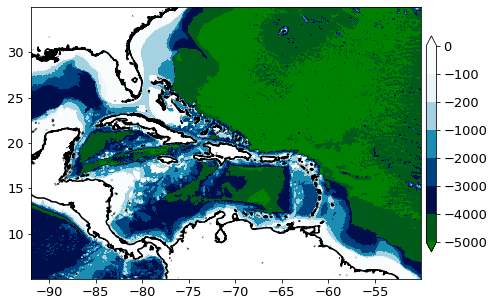

In [38]:
### load topography data
path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_24_Jul_2024/'
ds_topo = nc.Dataset(path_topo+'gebco_2024_n35.0_s5.0_w-92.0_e-50.0.nc')
# print(ds_topo)
lon_topo = ds_topo.variables['lon'][:]
lat_topo = ds_topo.variables['lat'][:]
elevation = ds_topo.variables['elevation'][:]
print(lon_topo.shape, lat_topo.shape, elevation.shape )
### plot
plt.clf()
fig, ax = plt.subplots(1)
plt.gcf().set_size_inches(7, 5)
plt.rcParams.update({'font.size': 13})
# levels_topo = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,300,100), np.arange(1000,6000,1000)))
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = plt.contourf(lon_topo, lat_topo, elevation, cmap='ocean',levels=levels_ocean,extend='both')
plt.contour(lon_topo, lat_topo, elevation, colors='k',levels=0)
### add colorbar
cbar_ax = fig.add_axes([.91,.2,.02,.6])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')


[2.95126345] [2.95126345]


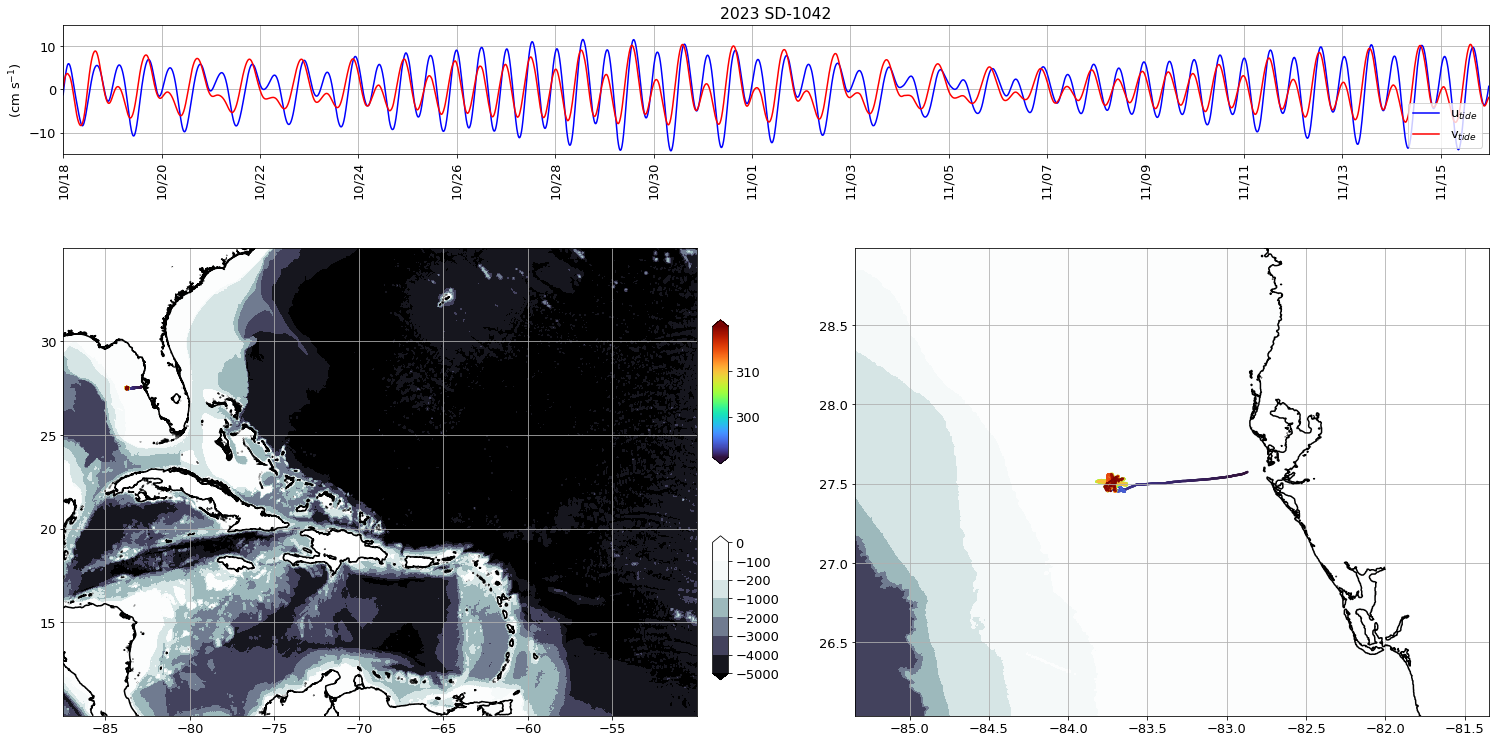

In [64]:
### plot time series of tidal current data & map
fig = plt.figure(figsize=(22,10))
plt.rcParams.update({'font.size': 13})
### xticks, xtickslabel
ddays = (np.max(dtime_cur_SD)-np.min(dtime_cur_SD)).days
xticks = [np.min(dtime_cur_SD)+datetime.timedelta(days=2*i) for i in range(ddays)]
xtickslabel = [xticks[i].strftime('%m/%d') for i in range(ddays)]
### (1) plot time series of tidal current
ax1 = fig.add_axes([0.05, 0.78, 0.9, 0.18])
ax1.plot(dtime_cur_SD, u_tide,'b-',label='u$_{tide}$')
ax1.plot(dtime_cur_SD, v_tide,'r-',label='v$_{tide}$')
ax1.plot()
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, rotation=90)
ax1.set_xlim([dtime_cur_SD[0],dtime_cur_SD[-1]])
ax1.set_ylim([-15,15])
ax1.set_ylabel('(cm s$^{-1}$)')
ax1.grid()
ax1.legend(loc='best')
ax1.set_title(year+' SD-'+platf_num)
### (2) plot regional map - big domain
ilon = np.where( lon_topo>= -87.5 )[0]
ilat = np.where( lat_topo>= 10 )[0]
ax2 = fig.add_axes([0.05,0,0.4,0.65])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap='bone',levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
ax2.grid()
### add SD tracks
sc = ax2.scatter(longitude, latitude, c=yday_cur_SD, s=2, vmin=np.min(yday_cur_SD), vmax=np.max(yday_cur_SD),cmap='turbo')
### add terrain colorbar
cbar_ax = fig.add_axes([.46,.05,.01,.2])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
### add time's colorbar
cbar_ax = fig.add_axes([.46,.35,.01,.2])
axf = plt.colorbar(sc,orientation='vertical',cax=cbar_ax,extend='both')
### (3) plot map smaller domain - zoom in SD tracks
ax3 = fig.add_axes([0.55,0,0.4,0.65])
lonlim = [np.min(longitude)-1, np.max(longitude)+1]
latlim = [np.min(latitude)-1, np.max((latitude)+1)]
if np.diff(lonlim)[0] > np.diff(latlim)[0]:
    diff = np.diff(lonlim)[0]-np.diff(latlim)[0]
    latlim[0] = latlim[0]-0.5*diff
    latlim[1] = latlim[1]+0.5*diff
else:
    diff = np.diff(latlim)[0]-np.diff(lonlim)[0]
    lonlim[0] = lonlim[0]-0.5*diff
    lonlim[1] = lonlim[1]+0.5*diff
print(np.diff(lonlim), np.diff(latlim))
ilon = np.where( (lon_topo>= lonlim[0]-5) & (lon_topo<= lonlim[1]+5) )[0]
ilat = np.where( (lat_topo>= latlim[0]-5) & (lat_topo<= latlim[1]+5) )[0]
cs = ax3.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap='bone',levels=levels_ocean,extend='both')
ax3.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
ax3.grid()
ax3.axis('equal')
ax3.set_xlim(lonlim)
ax3.set_ylim(latlim)
### add SD tracks
sc = ax3.scatter(longitude, latitude, c=yday_cur_SD, s=2, vmin=np.min(yday_cur_SD), vmax=np.max(yday_cur_SD),cmap='turbo')

### save figure
fig.savefig('timeseries_uv-tide_AND_map-tracks_'+year+'-SD'+platf_num+'.png', dpi=300,bbox_inches='tight')


In [55]:
lonlim = [np.min(longitude)-1, np.max(longitude)+1]
latlim = [np.min(latitude)-1, np.max((latitude)+1)]
if np.diff(lonlim)[0] > np.diff(latlim)[0]:
    diff = np.diff(lonlim)[0]-np.diff(latlim)[0]
    latlim[0] = latlim[0]-0.5*diff
    latlim[1] = latlim[1]+0.5*diff
else:
    diff = np.diff(latlim)[0]-np.diff(lonlim)[0]
    lonlim[0] = lonlim[0]-0.5*diff
    lonlim[1] = lonlim[1]+0.5*diff
print(np.diff(lonlim), np.diff(latlim))

[2.95126345] [2.95126345]
